# DATA CLEANING

In [12]:
import pandas as pd
import re
import string

data1 = pd.read_csv("data/input/IKN-3.csv")
data2 = pd.read_csv("data/input/IKN.csv")
data3 = pd.read_csv("data/input/IKN-1.csv")

data = pd.concat([data1, data2, data3], ignore_index=True)
data.fillna(1, inplace=True)

In [13]:
data = data[['full_text', 'username']]
data.head()

,full_text,username
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN
4,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim


In [14]:
data.shape

(2758, 2)

In [15]:
data_cleaned = data.drop_duplicates(subset=['full_text'], keep='first')
print(data_cleaned.shape)

(1797, 2)


In [16]:
def clean_text(text):
    # Hapus mention (@username) menggunakan regex
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag (#hashtag) menggunakan rege
    text = re.sub(r'#\w+', '', text)
    # Hapus URL menggunakan regex
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Hapus emoji menggunakan regex
    text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F]+', '', text)
    # Hapus semua tanda baca menggunakan regex
    # text = re.sub(r'[^\w\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text


In [17]:
data_cleaned['cleaned'] = data_cleaned['full_text'].apply(clean_text)
data_cleaned.head(10)

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22516\3589390958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['cleaned'] = data_cleaned['full_text'].apply(clean_text)


,full_text,username,cleaned
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...
6,Usulan DPR tak Ikut Pindah ke IKN Nusantara Di...,tribunkaltim,Usulan DPR tak Ikut Pindah ke IKN Nusantara Di...
7,Suasana Proyek Pembangunan Bandara VVIP IKN ap...,MitraIKN,Suasana Proyek Pembangunan Bandara VVIP IKN ap...
8,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Investasi di IKN Nusantara Dinilai Tidak Mengu...
9,Inilah Hunian ASN 4 yang mana pembangunan nya ...,RobieMrg,Inilah Hunian ASN 4 yang mana pembangunan nya ...
10,Investasi di IKN Nusantara Dinilai Tidak Mengu...,tribunkaltim,Investasi di IKN Nusantara Dinilai Tidak Mengu...


# TEXT PREPROCESSING

# CASE FOLDING

In [18]:
def preprocess_text(text):
  #ubah kalimat jadi huruf kecil
  lower_case = text.lower()
  #hapus angka dari kalimat
  result = re.sub(r"\d+", "", lower_case)
  #hapus tanda baca dari kalimat
  result = result.translate(str.maketrans("","",string.punctuation + "!!"))
  #hapus spasi awal & akhir kalimat
  result = result.strip()
  return result

In [19]:
data_cleaned['case_fold'] = data_cleaned['cleaned'].apply(preprocess_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22516\566120344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['case_fold'] = data_cleaned['cleaned'].apply(preprocess_text)


,full_text,username,cleaned,case_fold
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...


# TOKENIZING

In [20]:
import nltk
nltk.download ('all')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

data_cleaned['token'] = data_cleaned['case_fold'].apply(tokenize_text)
data_cleaned.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Bryant\AppData\Roaming\nltk_data...
[nltk_data] 

,full_text,username,cleaned,case_fold,token
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"[inilah, unit, rumah, tapak, jabatan, menteri,..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"[alhamdulillah, terima, kasih, berkenan, mengu..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"[pengamat, kritik, proyek, milik, konglomerat,..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"[wow‼️terlihat, dari, pinggir, jalan, gedungge..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"[waktu, ngedrone, roll, off, trafo, pln, di, p..."


# FILTERING (STOPWORD REMOVAL)

In [21]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [22]:
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

data_cleaned['stop'] = data_cleaned['token'].apply(stopword_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22516\2287921186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['stop'] = data_cleaned['token'].apply(stopword_text)


,full_text,username,cleaned,case_fold,token,stop
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"[inilah, unit, rumah, tapak, jabatan, menteri,...","[inilah, unit, rumah, tapak, jabatan, menteri,..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"[alhamdulillah, terima, kasih, berkenan, mengu...","[alhamdulillah, terima, kasih, berkenan, mengu..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"[pengamat, kritik, proyek, milik, konglomerat,...","[pengamat, kritik, proyek, milik, konglomerat,..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"[wow‼️terlihat, dari, pinggir, jalan, gedungge...","[wow‼️terlihat, pinggir, jalan, gedunggedung, ..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"[waktu, ngedrone, roll, off, trafo, pln, di, p...","[waktu, ngedrone, roll, off, trafo, pln, pelab..."


# STEMMING

In [23]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [24]:
def stemming_text(tokens):
  result = [stemmer.stem(token) for token in tokens]
  return result

data_cleaned['stemmed'] = data_cleaned['stop'].apply(stemming_text)
data_cleaned.head()

C:\Users\Bryant\AppData\Local\Temp\ipykernel_22516\3244601550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['stemmed'] = data_cleaned['stop'].apply(stemming_text)


,full_text,username,cleaned,case_fold,token,stop,stemmed
0,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,RobieMrg,Inilah 2 unit Rumah Tapak Jabatan Menteri yang...,inilah unit rumah tapak jabatan menteri yang ...,"[inilah, unit, rumah, tapak, jabatan, menteri,...","[inilah, unit, rumah, tapak, jabatan, menteri,...","[ini, unit, rumah, tapak, jabat, menteri, ramp..."
1,Alhamdulillah terima kasih berkenan mengunjung...,karyanto_wibowo,Alhamdulillah terima kasih berkenan mengunjung...,alhamdulillah terima kasih berkenan mengunjung...,"[alhamdulillah, terima, kasih, berkenan, mengu...","[alhamdulillah, terima, kasih, berkenan, mengu...","[alhamdulillah, terima, kasih, kenan, unjung, ..."
2,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,tribunkaltim,Pengamat Kritik 2 Proyek Milik Konglomerat Pen...,pengamat kritik proyek milik konglomerat pend...,"[pengamat, kritik, proyek, milik, konglomerat,...","[pengamat, kritik, proyek, milik, konglomerat,...","[amat, kritik, proyek, milik, konglomerat, duk..."
3,Wow‼️Terlihat dari pinggir jalan Gedung-gedung...,MitraIKN,Wow‼️Terlihat dari pinggir jalan Gedunggedung ...,wow‼️terlihat dari pinggir jalan gedunggedung ...,"[wow‼️terlihat, dari, pinggir, jalan, gedungge...","[wow‼️terlihat, pinggir, jalan, gedunggedung, ...","[wow lihat, pinggir, jalan, gedunggedung, jula..."
5,Waktu ngedrone roll off trafo PLN di pelabuhan...,normnsyah,Waktu ngedrone roll off trafo PLN di pelabuhan...,waktu ngedrone roll off trafo pln di pelabuhan...,"[waktu, ngedrone, roll, off, trafo, pln, di, p...","[waktu, ngedrone, roll, off, trafo, pln, pelab...","[waktu, ngedrone, roll, off, trafo, pln, labuh..."


In [25]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

all_tokens = [token for sublist in data_cleaned['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('ikn', 1346), ('nusantara', 733), ('lewat', 587), ('ibukotabaru', 490), ('solusimasadepan', 482), ('bangun', 395), ('kota', 319), ('ibu', 268), ('indonesia', 217), ('jadi', 200), ('pindah', 174), ('jokowi', 151), ('tuju', 126), ('negara', 124), ('presiden', 124), ('depan', 115), ('kalimantan', 110), ('perintah', 105), ('menteri', 96), ('investor', 94), ('baru', 93), ('masa', 92), ('lebih', 91), ('otorita', 90), ('baik', 89), ('sebut', 87), ('proyek', 86), ('investasi', 85), ('kaltim', 83), ('sama', 82), ('banget', 79), ('dukung', 78), ('kerja', 78), ('yg', 73), ('masuk', 70), ('lengkap', 69), ('maju', 68), ('tahun', 68), ('asn', 67), ('daftar', 66), ('solusi', 60), ('siap', 58), ('uu', 57), ('hingga', 56), ('masyarakat', 55), ('sih', 54), ('jakarta', 53), ('ibukota', 53), ('mulai', 53), ('rencana', 52), ('rp', 51), ('nih', 51), ('banyak', 50), ('lanjut', 48), ('jalan', 47), ('kepala', 47), ('bakal', 47), ('mitra', 46), ('rumah', 44), ('logo', 44), ('ini', 43), ('apa', 43), ('tak', 43

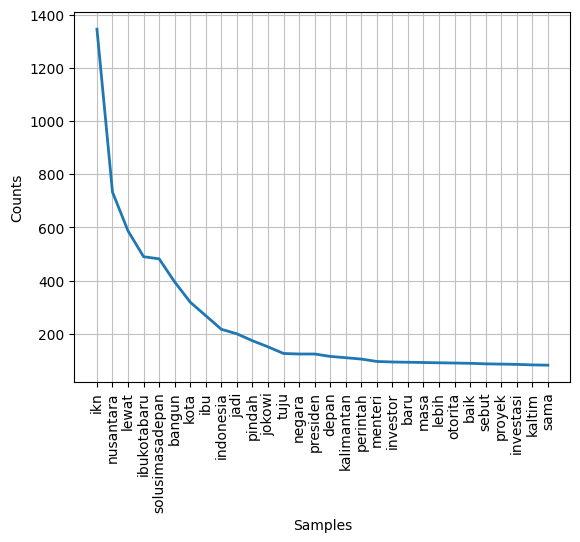

In [26]:
freq_dist.plot(30, cumulative=False)
plt.show()

In [27]:
data_cleaned.to_csv("preprocessed_data.csv", index = False)
data_cleaned = pd.read_csv("preprocessed_data.csv")
data_cleaned.shape

(1797, 7)